In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import os
from pathlib import Path
%matplotlib inline

In [2]:
print(sitk.Version())

SimpleITK Version: 1.1.0 (ITK 4.13)
Compiled: Mar 22 2018 21:14:44



In [3]:
# read in a test image from ProstateX-0000
ProstateX_0000_t2_path = Path('./nifti/ProstateX-0000/t2/4_t2_tse_tra.nii.gz')
ProstateX_0000_t2 = sitk.ReadImage(str(ProstateX_0000_t2_path))

In [4]:
print('Size: ', ProstateX_0000_t2.GetSize())
print('Origin: ', ProstateX_0000_t2.GetOrigin())
print('Spacing: ', ProstateX_0000_t2.GetSpacing())
print('Direction: ', ProstateX_0000_t2.GetDirection())
print('# Pixel Components: ', ProstateX_0000_t2.GetNumberOfComponentsPerPixel())

print('Width: ', ProstateX_0000_t2.GetWidth())
print('Height: ', ProstateX_0000_t2.GetHeight())
print('Depth: ' , ProstateX_0000_t2.GetDepth())

Size:  (384, 384, 19)
Origin:  (-57.6854362487793, 99.25103759765625, -87.81437683105469)
Spacing:  (0.5, 0.5, 3.0)
Direction:  (0.999999210146702, -2.0033508988982908e-10, 0.0012568721288006698, -0.0003986104797413161, -0.9483764490953768, 0.3171465608362627, -0.0011919797219437308, 0.31714682845843534, 0.9483757057317436)
# Pixel Components:  1
Width:  384
Height:  384
Depth:  19


In [5]:
type(ProstateX_0000_t2.GetSpacing())

tuple

In [6]:
t1 = (1,1,1)
t2 = (2,2,2)

In [7]:
t1 == t2

False

In [8]:
set([(1,1,1), (2,2,2), (3,3,3), (1,1,1)])

{(1, 1, 1), (2, 2, 2), (3, 3, 3)}

In [49]:
def get_information_for_image(image_path):
    
    """Accepts a path object and returns a tuple containing voxel spacing (tuple) and 
    image size (tuple) for the nifti file at the given path"""
   
    sitk_image = sitk.ReadImage(str(image_path))
    voxel_spacing = sitk_image.GetSpacing()
    image_size = sitk_image.GetSize()
    return (voxel_spacing, image_size)
    
def process_modality(modality):
    
    """Accepts a modality (str) and returns a dict containing voxel spacings (lst of tuples) 
    and image sizes (lst of tuples) for the desired modality"""
    
    voxel_spacings = []
    image_sizes = []
    paths_to_nifti = Path('./nifti')
    patient_folders = [x for x in paths_to_nifti.iterdir() if x.is_dir()]
    for patient_folder in patient_folders:
        subdirectories = [x for x in patient_folder.iterdir() if x.is_dir()]
        for subdirectory in subdirectories:
            if modality in str(subdirectory):
                modality_file = [x for x in subdirectory.iterdir()]
                if len(modality_file) != 0:
                    information = get_information_for_image(modality_file[0])
                    voxel_spacings.append(information[0])
                    image_sizes.append(information[1])
    return {'voxel_spacings':voxel_spacings, 'image_sizes':image_sizes}

In [50]:
t2 = process_modality('t2')

In [96]:
def generate_charts(modality):
    
    processed_modality = process_modality(modality)
    voxel_spacings = processed_modality['voxel_spacings']
    image_sizes = processed_modality['image_sizes']
    
    def count_elements(sequence):
        tally = {}
        for element in sequence:
            tally[str(element)] = tally.get(str(element), 0) + 1
        return tally
    
    voxel_count = count_elements(voxel_spacings)
    size_count = count_elements(image_sizes)
    
    v_keys = list(voxel_count.keys())
    v_values = list(voxel_count.values())
    s_keys = list(size_count.keys())
    s_values = list(size_count.values())
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    plt.title(modality + ' voxel spacings')
    plt.xlabel('pixel spacing (x,y,z) in mm')
    plt.ylabel('patient count')
    plt.xticks(rotation=90)
    plt.bar(v_keys, v_values)
    
    plt.subplot(1,2,2)
    plt.title(modality + ' image sizes')
    plt.xlabel('(w,h,d)')
    plt.ylabel('patient count')
    plt.xticks(rotation=90)
    plt.bar(s_keys, s_values)
    

<BarContainer object of 4 artists>

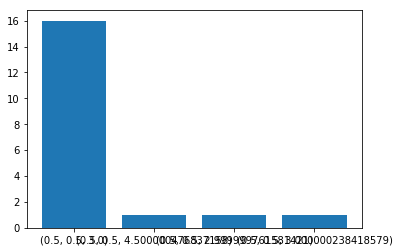

In [69]:
# need dictionary of counts for each unique tuple
# a set can yield unique tuples for the keys

# voxel_spaces = list(dictionary_name.keys())
# counts = list(dictionary_name.values())
# plt.bar(voxel_spaces, counts)

names = list(t2_tally.keys())
values = list(t2_tally.values())

plt.bar(str(names, values)

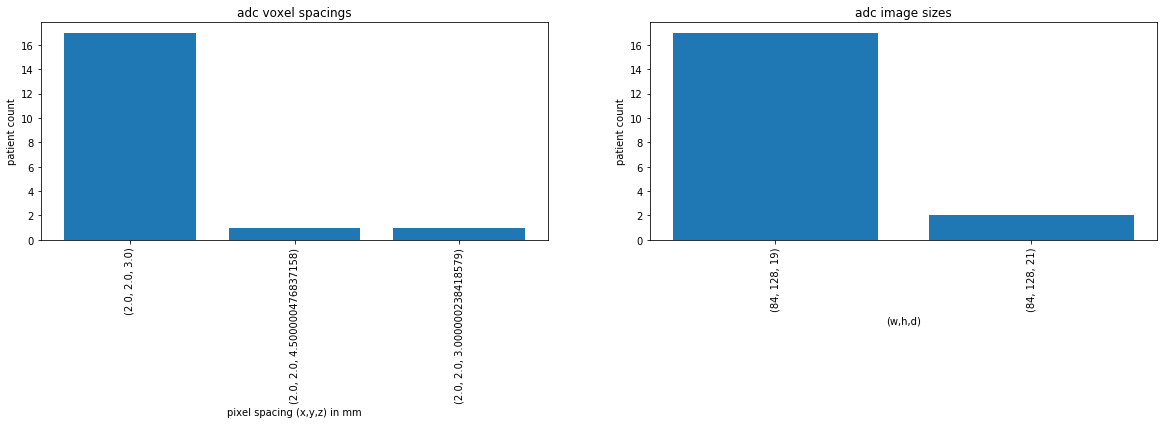

In [101]:
generate_charts('adc')

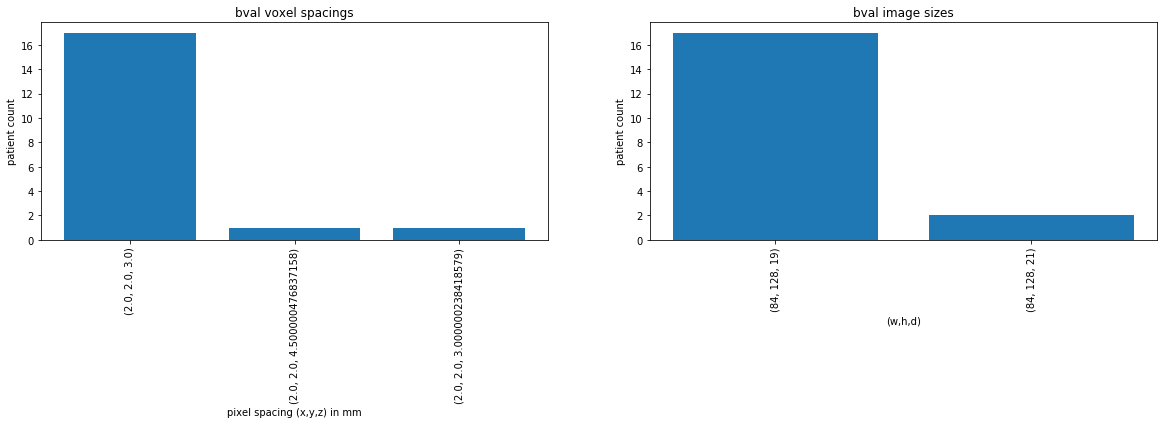

In [102]:
generate_charts('bval')

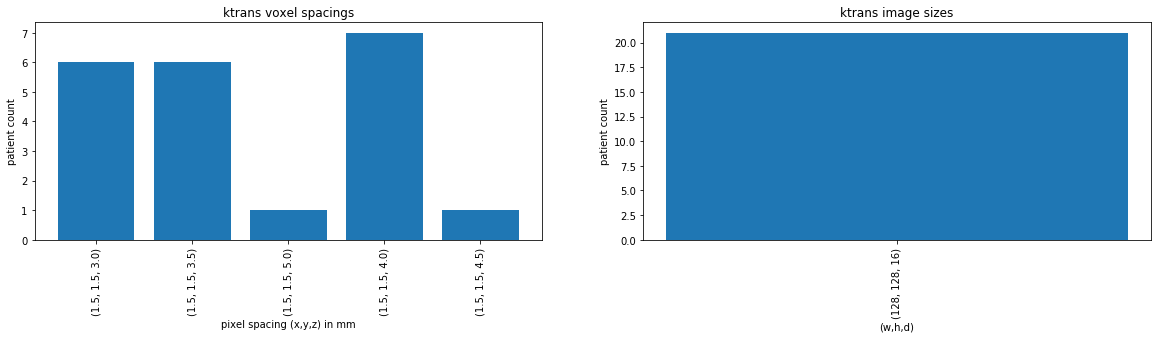

In [103]:
generate_charts('ktrans')

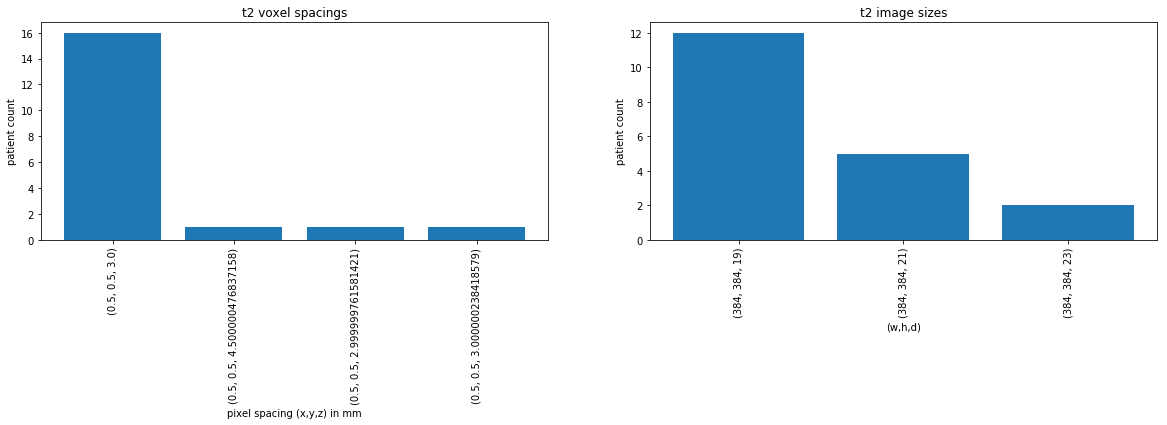

In [104]:
generate_charts('t2')